## Ideal Filter

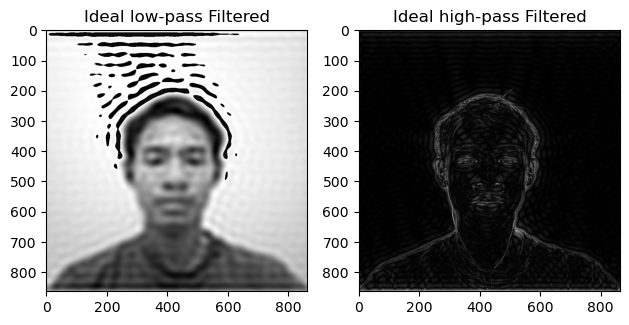

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# load citra grayscale
img = r"C:\Users\Rio Agustian\Documents\S1 FISIKA\PENGOLAHAN_CITRA\sigma.jpg"
img = cv.imread(img, 0)

# hitung transformasi Fourier
f = np.fft.fft2(img)

# pergeseran nol frekuensi ke tengah
fshift = np.fft.fftshift(f)

# magnitude spectrum citra asal
magnitude_spectrum = np.absolute(fshift)
magnitude_spectrum_log = np.zeros(magnitude_spectrum.shape, dtype=magnitude_spectrum.dtype)
cv.normalize(cv.log(1 + magnitude_spectrum), magnitude_spectrum_log, 0, 255, cv.NORM_MINMAX)
magnitude_spectrum_log_uint8 = magnitude_spectrum_log.astype(np.uint8)

# membuat filter low-pass, misalnya dengan jari-jari 10
rows, cols = img.shape
crow, ccol = rows//2, cols//2
mask_LPF = np.zeros((rows, cols), np.uint8)
r = 25
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]

# semua nilai (x,y) di dalam area jari-jari diubah nilainya menjadi 1
mask_LPF_area = (x - center[0])**2 + (y - center[1])**2 <= r*r
mask_LPF[mask_LPF_area] = 1

# membuat filter high-pass ukuran 101x101, lingkaranmisalnya dengan jari-jari 15
mask_HPF = np.zeros((rows, cols), np.uint8)

# semua nilai (x,y) di luar jari-jari diubah nilainyamenjadi 1
mask_HPF_area = (x - center[0])**2 + (y - center[1])**2 >= r*r
mask_HPF[mask_HPF_area] = 1

# aplikasikan filter pada citra di domain frekuensi
fshift_LPF_filtered = fshift * mask_LPF
fshift_HPF_filtered = fshift * mask_HPF

#magnitude spectrum citra asal terfilter LPF
mag_fshift_LPF_filtered = np.absolute(fshift_LPF_filtered)
LPF_magnitude_spectrum_log = np.zeros(mag_fshift_LPF_filtered.shape, dtype=mag_fshift_LPF_filtered.dtype)
cv.normalize(cv.log(1 + mag_fshift_LPF_filtered), LPF_magnitude_spectrum_log, 0, 255, cv.NORM_MINMAX)
LPF_magnitude_spectrum_log_uint8 = LPF_magnitude_spectrum_log.astype(np.uint8)

#magnitude spectrum citra asal terfilter HPF
mag_fshift_HPF_filtered = np.absolute(fshift_HPF_filtered)
HPF_magnitude_spectrum_log = np.zeros(mag_fshift_HPF_filtered.shape, dtype=mag_fshift_HPF_filtered.dtype)
cv.normalize(cv.log(1 + mag_fshift_HPF_filtered), HPF_magnitude_spectrum_log, 0, 255, cv.NORM_MINMAX)
HPF_magnitude_spectrum_log_uint8 = HPF_magnitude_spectrum_log.astype(np.uint8)

# pergeseran nol frekuensi kembali ke posisi semula
f_LPF_filtered = np.fft.ifftshift(fshift_LPF_filtered)
f_HPF_filtered = np.fft.ifftshift(fshift_HPF_filtered)

# hitung inverse Fourier transform
img_LPF_filtered = np.fft.ifft2(f_LPF_filtered)
img_HPF_filtered = np.fft.ifft2(f_HPF_filtered)

# konversi ke tipe data unsigned integer 8-bit
img_LPF_filtered = np.abs(img_LPF_filtered)
img_LPF_filtered = img_LPF_filtered.astype(np.uint8)
img_HPF_filtered = np.abs(img_HPF_filtered)
img_HPF_filtered = img_HPF_filtered.astype(np.uint8)

# plt.figure(dpi=300)

plt.subplot(121)
plt.imshow(img_LPF_filtered,cmap="gray")
plt.title("Ideal low-pass Filtered")

plt.subplot(122)
plt.imshow(img_HPF_filtered,cmap="gray")
plt.title("Ideal high-pass Filtered")

plt.tight_layout()
plt.show()

## Butterworth Filter

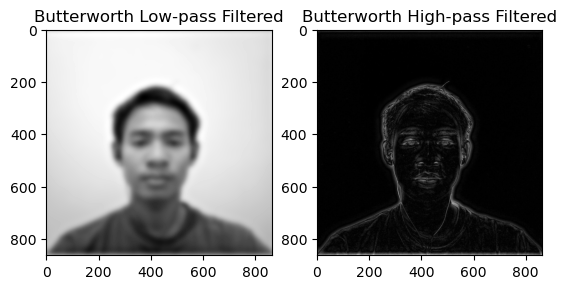

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def magFFT(dft_shift,mode="log"):
    # Menghitung Magnitude Spectrum (nilai absolut) pada skala linier
    magnitude_spectrum = cv.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1])
    if mode == "abs":
        # Normalisasi Magnitude Spectrum ke dalam rentang 0-255
        magnitude_spectrum_normalized = cv.normalize(
        magnitude_spectrum, None, 0, 255, cv.NORM_MINMAX)
        # Konversi Magnitude Spectrum ke dalam tipedata uint8
        magnitude_spectrum_uint8 =magnitude_spectrum_normalized.astype(np.uint8)
        hasil = magnitude_spectrum_uint8
    else:
        magnitude_spectrum_log = np.zeros(
        magnitude_spectrum.shape, dtype=magnitude_spectrum.dtype)
        cv.normalize(cv.log(1 + magnitude_spectrum),
        magnitude_spectrum_log, 0, 255, cv.NORM_MINMAX)
        magnitude_spectrum_log_uint8 = magnitude_spectrum_log.astype(np.uint8)
        hasil = magnitude_spectrum_log_uint8
    return hasil

# Load image
img = r"C:\Users\Rio Agustian\Documents\S1 FISIKA\PENGOLAHAN_CITRA\sigma.jpg"
img = cv.imread(img, 0)

# DFT
dft = cv.dft(np.float32(img), flags=cv.
DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# Butterworth High-pass Filter
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
D = 20 # cutoff radius
n = 2 # order
butterworth_hpf = np.zeros((rows, cols), np.float32)
for i in range(rows):
    for j in range(cols):
        distance = np.sqrt((i - crow)**2 + (j - ccol)**2)
        butterworth_hpf[i, j] = 1 - 1 / (1 + (distance/ D)**(2*n))

# Filtering
fshift_butterworth_hpf0 = dft_shift * butterworth_hpf[:, :, np.newaxis]
fshift_butterworth_hpf = np.fft.ifftshift(fshift_butterworth_hpf0)
img_butterworth_hpf = cv.idft(fshift_butterworth_hpf)
img_butterworth_hpf = cv.magnitude(img_butterworth_hpf[:, :, 0], img_butterworth_hpf[:, :, 1])

# Butterworth Low-pass Filter
butterworth_lpf = 1 - butterworth_hpf

# Filtering
fshift_butterworth_lpf0 = dft_shift * butterworth_lpf[:, :, np.newaxis]
fshift_butterworth_lpf = np.fft.ifftshift(fshift_butterworth_lpf0)
img_butterworth_lpf = cv.idft(fshift_butterworth_lpf)
img_butterworth_lpf = cv.magnitude(img_butterworth_lpf[:, :, 0], img_butterworth_lpf[:, :, 1])

plt.subplot(122)
plt.imshow(img_butterworth_hpf, cmap="gray")
plt.title("Butterworth High-pass Filtered")

plt.subplot(121)
plt.imshow(img_butterworth_lpf, cmap="gray")
plt.title("Butterworth Low-pass Filtered")

plt.show()

## Gaussian Filter

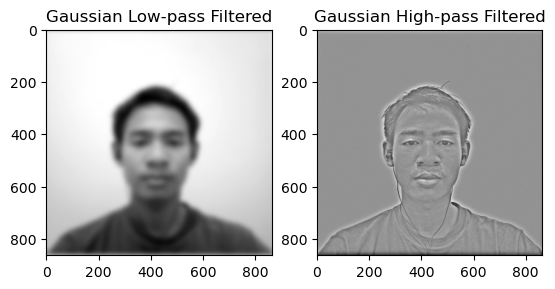

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = r"C:\Users\Rio Agustian\Documents\S1 FISIKA\PENGOLAHAN_CITRA\sigma.jpg"
img = cv.imread(img, 0)

# Perform Fourier transform
dft_img = cv.dft(np.float32(img), flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft_img)

# Create Gaussian filter
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
sigma = 15
gaussian_filter_LPF = np.zeros((rows, cols), np.float32)
for i in range(rows):
    for j in range(cols):
        gaussian_filter_LPF[i, j] = np.exp(-((i - crow)** 2 + (j - ccol) ** 2) / (2 * sigma ** 2))
gaussian_filter_HPF = 1 - gaussian_filter_LPF

# Apply Gaussian filter
dft_shift_LPF = dft_shift * gaussian_filter_LPF[:, :,np.newaxis]
dft_inv_LPF = np.fft.ifftshift(dft_shift_LPF)
img_back_LPF = cv.idft(dft_inv_LPF, flags=cv.DFT_SCALE | cv.DFT_REAL_OUTPUT)

dft_shift_HPF = dft_shift * gaussian_filter_HPF[:, :,np.newaxis]
dft_inv_HPF = np.fft.ifftshift(dft_shift_HPF)
img_back_HPF = cv.idft(dft_inv_HPF, flags=cv.DFT_SCALE | cv.DFT_REAL_OUTPUT)


plt.subplot(122)
plt.imshow(img_back_HPF, cmap="gray")
plt.title("Gaussian High-pass Filtered")

plt.subplot(121)
plt.imshow(img_back_LPF, cmap="gray")
plt.title("Gaussian Low-pass Filtered")
plt.show()